In [1]:
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import SimulationParameters, OptimizationParameters, FilterParameters, ConstantCurrentInjection, RampCurrentInjection
from act.cell_model import TargetCell
from act.module_parameters import ModuleParameters

random_seed = 42
num_slices = 2
experiment_folder = f"output/LAA_original-{num_slices}/{random_seed}"
target_folder = experiment_folder + "/target"
module_folder = experiment_folder + "/module_final"

target_cell = TargetCell(
    path_to_hoc_file="/home/mwsrgf/proj/ACT/data/LAA/orig_modfiles/template.hoc",
    path_to_mod_files="/home/mwsrgf/proj/ACT/data/LAA/orig_modfiles",
    cell_name="Cell_A",
    passive=["ghdbar_hd","glbar_leak"],
    active_channels=["gbar_nap",
                     "gmbar_im", 
                     "gbar_na3",
                     "gkdrbar_kdr", 
                     "gcabar_cadyn", 
                     "gsAHPbar_sAHP", 
                     "gkabar_kap"]
)

sim_par= SimulationParameters(
            h_v_init=-65.0,  # Consistent with nrngui settings
            h_tstop=500,     # Simulation time in ms
            h_dt=0.1,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI=[ConstantCurrentInjection(amp=0.060,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.065,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.070,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.075,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.08,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.0,dur=300,delay=100),
                ConstantCurrentInjection(amp=0.1,dur=300,delay=100),
                ConstantCurrentInjection(amp=0.2,dur=300,delay=100),
                ConstantCurrentInjection(amp=0.3,dur=300,delay=100),
                ConstantCurrentInjection(amp=0.4,dur=300,delay=100),
                ConstantCurrentInjection(amp=2.5,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=3.0,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=3.5,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=4.0,dur=300,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=4.5,dur=300,delay=100, lto_hto=1)],
            set_g_to=[]
        )

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


In [2]:
sg = SyntheticGenerator(
    ModuleParameters(
        module_folder_name=target_folder,
        cell= target_cell,
        sim_params= sim_par
    )
)

sg.generate_synthetic_target_data("target_data.csv")


        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
/home/mwsrgf/proj/ACT/experiments/LA_A/not-filtered/output/LAA_original-2/42/target/synthetic_0.06_0.065_0.07_0.075_0.08_0.0_0.1_0.2_0.3_0.4_2.5_3.0_3.5_4.0_4.5


In [3]:
from act.cell_model import TrainCell

train_cell = TrainCell(
    path_to_hoc_file="/home/mwsrgf/proj/ACT/data/LAA/orig_modfiles/template.hoc",
    path_to_mod_files="/home/mwsrgf/proj/ACT/data/LAA/orig_modfiles",
    cell_name="Cell_A",
    passive=["ghdbar_hd","glbar_leak"],
    active_channels=["gbar_nap",
                     "gmbar_im", 
                     "gbar_na3",
                     "gkdrbar_kdr", 
                     "gcabar_cadyn", 
                     "gsAHPbar_sAHP", 
                     "gkabar_kap"]
)

# Tune Passive Properties

In [4]:
import random

random.seed(random_seed)

glbar_leak = 5.5e-5
ghdbar_hd=2.3e-05
gmbar_im = 0.002
gbar_nap= 0.000142
gbar_na3=0.03
gkdrbar_kdr=0.0015
gcabar_cadyn = 6e-5
gsAHPbar_sAHP = 0.009
gkabar_kap = 0.000843

im_low_offset = random.uniform(0,gmbar_im/2)
nap_low_offset = random.uniform(0,gbar_nap/2)
na3_low_offset = random.uniform(0,gbar_na3/2)
kdr_low_offset = random.uniform(0,gkdrbar_kdr/2)
cadyn_low_offset = random.uniform(0,gcabar_cadyn/2)
sAHP_low_offset = random.uniform(0,gsAHPbar_sAHP/2)
kap_low_offset = random.uniform(0,gkabar_kap/2)

im_low = gmbar_im - im_low_offset
im_high = gmbar_im + ((gmbar_im/2) - im_low_offset)

nap_low = gbar_nap - nap_low_offset
nap_high = gbar_nap + ((gbar_nap/2) - nap_low_offset)

na3_low = gbar_na3 - na3_low_offset
na3_high = gbar_na3 + ((gbar_na3/2) - na3_low_offset)

kdr_low = gkdrbar_kdr - kdr_low_offset
kdr_high = gkdrbar_kdr + ((gkdrbar_kdr/2) - kdr_low_offset)

cadyn_low = gcabar_cadyn - cadyn_low_offset
cadyn_high = gcabar_cadyn + ((gcabar_cadyn/2) - cadyn_low_offset)

sAHP_low = gsAHPbar_sAHP - sAHP_low_offset
sAHP_high = gsAHPbar_sAHP + ((gsAHPbar_sAHP/2) - sAHP_low_offset)

kap_low = gkabar_kap - kap_low_offset
kap_high = gkabar_kap + ((gkabar_kap/2) - kap_low_offset)


print(f"im: ({im_low},{im_high}) -- TRUE: {gmbar_im}")
print(f"nap: ({nap_low},{nap_high}) -- TRUE: {gbar_nap}")
print(f"na3: ({na3_low},{na3_high}) -- TRUE: {gbar_na3}")
print(f"kdr: ({kdr_low},{kdr_high}) -- TRUE: {gkdrbar_kdr}")
print(f"cadyn: ({cadyn_low},{cadyn_high}) -- TRUE: {gcabar_cadyn}")
print(f"sAHP: ({sAHP_low},{sAHP_high}) -- TRUE: {gsAHPbar_sAHP}")
print(f"kap: ({kap_low},{kap_high}) -- TRUE: {gkabar_kap}")

print("-------------")
print("Range (high - low) ")
print(f"im range: {im_high - im_low} -- 50% TRUE: {gmbar_im/2}")
print(f"nap range: {nap_high - nap_low} -- 50% TRUE: {gbar_nap/2}")
print(f"na3 range: {na3_high - na3_low} -- 50% TRUE: {gbar_na3/2}")
print(f"kdr range: {kdr_high - kdr_low} -- 50% TRUE: {gkdrbar_kdr/2}")
print(f"cadyn range: {cadyn_high - cadyn_low} -- 50% TRUE: {gcabar_cadyn/2}")
print(f"sAHP range: {sAHP_high - sAHP_low} -- 50% TRUE: {gsAHPbar_sAHP/2}")
print(f"kap range: {kap_high - kap_low} -- 50% TRUE: {gkabar_kap/2}")

im: (0.0013605732015421162,0.0023605732015421163) -- TRUE: 0.002
nap: (0.00014022423637919065,0.00021122423637919067) -- TRUE: 0.000142
na3: (0.02587456022446321,0.04087456022446321) -- TRUE: 0.03
kdr: (0.001332591946388383,0.002082591946388383) -- TRUE: 0.0015
cadyn: (3.790586357507963e-05,6.790586357507963e-05) -- TRUE: 6e-05
sAHP: (0.005954852306596899,0.010454852306596898) -- TRUE: 0.009
kap: (0.00046694631221240766,0.0008884463122124076) -- TRUE: 0.000843
-------------
Range (high - low) 
im range: 0.001 -- 50% TRUE: 0.001
nap range: 7.100000000000002e-05 -- 50% TRUE: 7.1e-05
na3 range: 0.015 -- 50% TRUE: 0.015
kdr range: 0.00075 -- 50% TRUE: 0.00075
cadyn range: 3.0000000000000004e-05 -- 50% TRUE: 3e-05
sAHP range: 0.004499999999999999 -- 50% TRUE: 0.0045
kap range: 0.00042149999999999995 -- 50% TRUE: 0.0004215


In [5]:
from act.ACTModule import ACTModule
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import  SimulationParameters, OptimizationParameters, ConductanceOptions
from act.module_parameters import ModuleParameters
from act.cell_model import TrainCell

mod = ACTModule(
    ModuleParameters(
        module_folder_name=module_folder,
        cell= train_cell,
        target_traces_file = f"{target_folder}/target_data.csv",
        sim_params= sim_par,
        optim_params= OptimizationParameters(
            conductance_options = [
                ConductanceOptions(variable_name="gbar_nap", low=nap_low, high= nap_high, n_slices=num_slices),
                ConductanceOptions(variable_name="gmbar_im", low=im_low, high= im_high,  n_slices=num_slices),
                ConductanceOptions(variable_name="gbar_na3", low=na3_low, high= na3_high, n_slices=num_slices),
                ConductanceOptions(variable_name="gbar_kdr", low=kdr_low, high= kdr_high, n_slices=num_slices),
                ConductanceOptions(variable_name="gcabar_cadyn", low= cadyn_low, high= cadyn_high, n_slices=num_slices),
                ConductanceOptions(variable_name="gsAHPbar_sAHP", low= sAHP_low, high= sAHP_high, n_slices=num_slices),
                ConductanceOptions(variable_name="gkabar_kap", low= kap_low, high= kap_high, n_slices=num_slices)
            ],
            train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats", "lto-hto_amplitude", "lto-hto_frequency"],
            prediction_eval_method='features',
            save_file=f"{module_folder}/results/saved_metrics.json"
        )
    )
)

In [6]:
predicted_g_data_file = mod.run()

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA

        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Getting Conductance Combinations From Preselected Ranges
/home/mwsrgf/proj/ACT/experiments/LA_A/not-filtered/output/LAA_original-2/42/module_final/train
(15, 5000, 3)
['i_trace_stats', 'number_of_spikes', 'spike_times', 'spike_height_stats', 'trough_times', 'trough_height_stats', 'lto-hto_amplitude', 'lto-hto_frequency']
True
True
[6.66666667e-03 6.66666667e-03 6.66666667e-03 1.00000000e-02
 1.00000000e-02 1.00000000e+06 1.00000000e+06 1.00000000e+06
 1.00000000e+06 1.00000000e+06 3.33333333e-03 3.33333333e-03
 3.33333333e-03 3.33333333e-03 3.33333333e-03]
TRAINING RANDOM FOREST REGRESSOR
['i_trace_stats', 'number_of_spikes', 'spike_times', 'spike_height_stats', 'trough_times', 'trough_height_stats', 'lto-hto_amplitude', 'lto-hto_frequency']
True
True
[0.01       0.01       0.01       .

In [7]:
mod.pickle_rf(mod.rf_model,f"{module_folder}/trained_rf.pkl")
print(train_cell.active_channels)

{'gbar_nap': 0.00021122423637919756, 'gmbar_im': 0.00236057320154214, 'gbar_na3': 0.040874560224464215, 'gbar_kdr': 0.0020825919463884498, 'gcabar_cadyn': 6.790586357507956e-05, 'gsAHPbar_sAHP': 0.01045485230659679, 'gkabar_kap': 0.0008884463122124033}


# Results & Metrics

In [8]:
from act import ACTPlot
ACTPlot.plot_v_comparison(
    module_folder,
    predicted_g_data_file, 
    sim_par.CI,
    sim_par.h_dt
    )

ACTPlot.plot_fi_comparison(
    module_folder, 
    sim_par.CI
    )

In [9]:
from act.Metrics import Metrics

metrics = Metrics()

mean, stdev = metrics.save_interspike_interval_comparison(
    module_folder,
    predicted_g_data_file,
    sim_par.CI, 
    sim_par.h_dt,
    first_n_spikes=5,
    save_file=f"{module_folder}/results/saved_metrics.json"
)

'''
gmbar_im = 0.002
gbar_nap= 0.000142
gbar_na3=0.03
gkdrbar_kdr=0.0015
gcabar_cadyn = 6e-5
gsAHPbar_sAHP = 0.009
gkabar_kap = 0.000843
'''

actual_g={"gbar_nap": 0.000142, "gmbar_im": 0.002, "gbar_na3":0.03,"gkdrbar_kdr":0.0015, "gcabar_cadyn": 6e-5, "gsAHPbar_sAHP": 0.009, "gkabar_kap": 0.000843}

    
metrics.save_prediction_g_mae(
    actual_g=actual_g,
    save_file=f"{module_folder}/results/saved_metrics.json"
)

metrics.save_feature_mae(
    module_folder,
    predicted_g_data_file,
    ["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats", "lto-hto_amplitude", "lto-hto_frequency"],
    sim_par.h_dt,
    first_n_spikes=5,
    CI_settings=sim_par.CI,
    save_file=f"{module_folder}/results/saved_metrics.json"
)


Interspike times (Target): [[1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [8.360e+01 1.000e+06 1.000e+06 1.000e+06]
 [6.730e+01 1.000e+06 1.000e+06 1.000e+06]
 [5.940e+01 7.640e+01 1.000e+06 1.000e+06]
 [1.847e+02 6.590e+01 1.000e+06 1.000e+06]
 [1.900e+02 6.500e+01 1.000e+06 1.000e+06]
 [2.492e+02 1.000e+06 1.000e+06 1.000e+06]
 [2.447e+02 1.000e+06 1.000e+06 1.000e+06]
 [2.434e+02 1.000e+06 1.000e+06 1.000e+06]]
Interspike times (Prediction): [[1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e

['i_trace_stats', 'number_of_spikes', 'spike_times', 'spike_height_stats', 'trough_times', 'trough_height_stats', 'lto-hto_amplitude', 'lto-hto_frequency']
True
True
[6.66666667e-03 6.66666667e-03 6.66666667e-03 1.00000000e-02
 1.00000000e-02 1.00000000e+06 1.00000000e+06 1.00000000e+06
 1.00000000e+06 1.00000000e+06 3.33333333e-03 3.33333333e-03
 3.33333333e-03 3.33333333e-03 3.33333333e-03]
vsample_features: 15: [[ 3.60000000e-02  2.93938769e-02  0.00000000e+00  1.00000000e+06
   1.00000000e+06  1.00000000e+06  1.00000000e+06  1.00000000e+06
   1.00000000e+06  1.00000000e+06  1.00000000e+06  1.00000000e+06
   1.00000000e+06  1.00000000e+06  1.00000000e+06  1.00000000e+06
   1.00000000e+06  1.00000000e+06  1.00000000e+06  1.00000000e+06
   1.00000000e+06  1.00000000e+06  1.00000000e+06  1.00000000e+06
   1.00000000e+06  1.00000000e+06  1.00000000e+06  1.00000000e+06
   1.00000000e+06  1.00000000e+06  1.00000000e+06  1.00000000e+06
   1.00000000e+06  1.00000000e+06  1.00000000e+06  1.0

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 1)

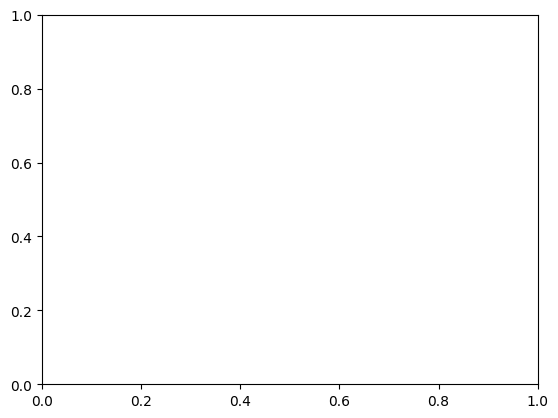

In [10]:
from act import ACTPlot as actplt

g_names = ["gbar_nap",
            "gmbar_im", 
            "gbar_na3",
            "gkdrbar_kdr", 
            "gcabar_cadyn", 
            "gsAHPbar_sAHP", 
            "gkabar_kap"]

for i in range(len(g_names)-1):
    actplt.plot_training_feature_mae_contour_plot(
        module_folder,
        sim_par.CI,
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats", "lto-hto_amplitude", "lto-hto_frequency"],
        threshold=0,
        first_n_spikes=20,
        num_levels=100,
        results_filename=f"{module_folder}/results/Feature_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )

In [ ]:
from act import ACTPlot as actplt

g_names = ["gbar_nap",
            "gmbar_im", 
            "gbar_na3",
            "gkdrbar_kdr", 
            "gcabar_cadyn", 
            "gsAHPbar_sAHP", 
            "gkabar_kap"]

for i in range(len(g_names)-1):
    actplt.plot_training_fi_mae_contour_plot(
        module_folder,
        sim_par.CI, 
        sim_par.CI[0].dur,
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        results_filename=f"{module_folder}/results/FI_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )

In [ ]:
from act import ACTPlot as actplt

g_names = ["gbar_na3", "gkdrbar_kdr","gbar_nap","gmbar_im"]

for i in range(len(g_names)-1):
    actplt.plot_training_v_mae_contour_plot(
        module_folder,
        sim_par.CI, 
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        results_filename=f"{module_folder}/results/Voltage_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )